In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
import pandas as pd
import numpy as np
import os

In [11]:
path = f'/content/drive/MyDrive/voice_project/final_master_gold_list.csv'

In [12]:
df = pd.read_csv(path)

In [13]:
df.head()


,client_id,path,sentence_id,sentence,up_votes,down_votes,age,gender,accents,locale
0,d1d2783ca2e190ae3bcb4b14fb894f5df1cc89d2ba3144...,common_voice_en_158507.mp3,090752ce947d19dea53d9c749eb5260e7a1dfa95bb9b58...,That'll close my account.,3,0,twenties,male_masculine,United States English,en
1,d1d2783ca2e190ae3bcb4b14fb894f5df1cc89d2ba3144...,common_voice_en_158508.mp3,418bf87655378f7ac084389d1df8990d8f448890bd9d29...,Congressman Aaron is here to see you.,2,1,twenties,male_masculine,United States English,en
2,d1d2783ca2e190ae3bcb4b14fb894f5df1cc89d2ba3144...,common_voice_en_158509.mp3,d243b194937972fa009c33132a09e2839fd5bc850a023b...,Did you give her the money?,2,1,twenties,male_masculine,United States English,en
3,e25bc5169494fae7f4545ad62c0b1a698bb2a7d5defae6...,common_voice_en_15904995.mp3,7a3673c82e3f965d50ec3a580eef4c19d7845edcc913cf...,Out of the frying pan into the fire.,2,1,twenties,male_masculine,NaN,en
4,e624baa6f6e176f8f63a0ba38116bb40086ba61c411fa8...,common_voice_en_15903553.mp3,99c17d9c3b40d76a674f7c0367c2ad9d50b28be323459d...,The allies lost another airborne division duri...,2,0,twenties,male_masculine,United States English,en


In [14]:
df.shape

(84694, 10)

In [15]:

print(df['age'].value_counts())
print("\n")
print(df['gender'].value_counts())

age
twenties     31961
thirties     19050
fourties     12415
fifties       9222
teens         7051
sixties       3013
seventies     1979
nineties         3
Name: count, dtype: int64


gender
male_masculine     73821
female_feminine    10873
Name: count, dtype: int64


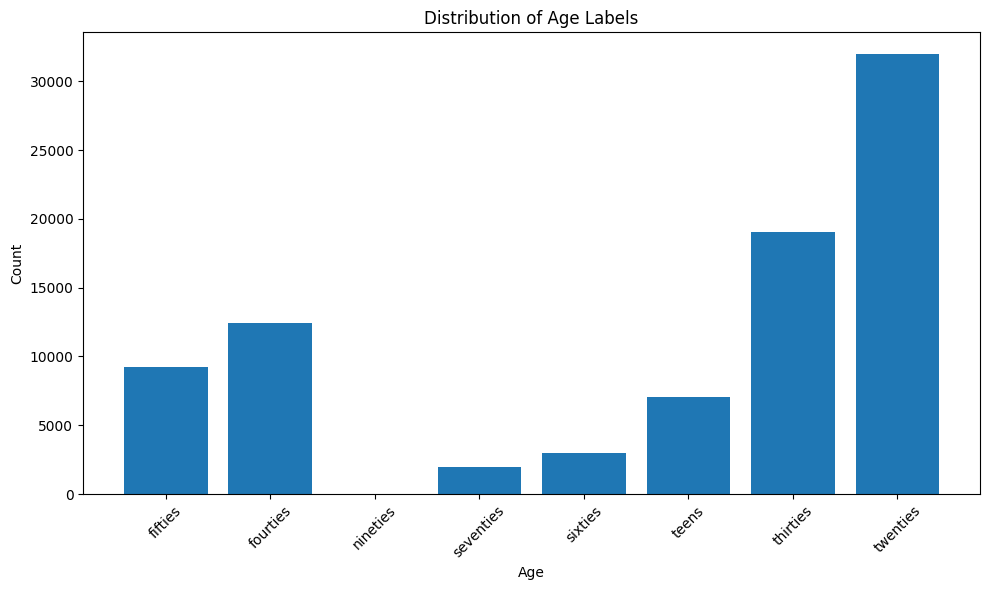

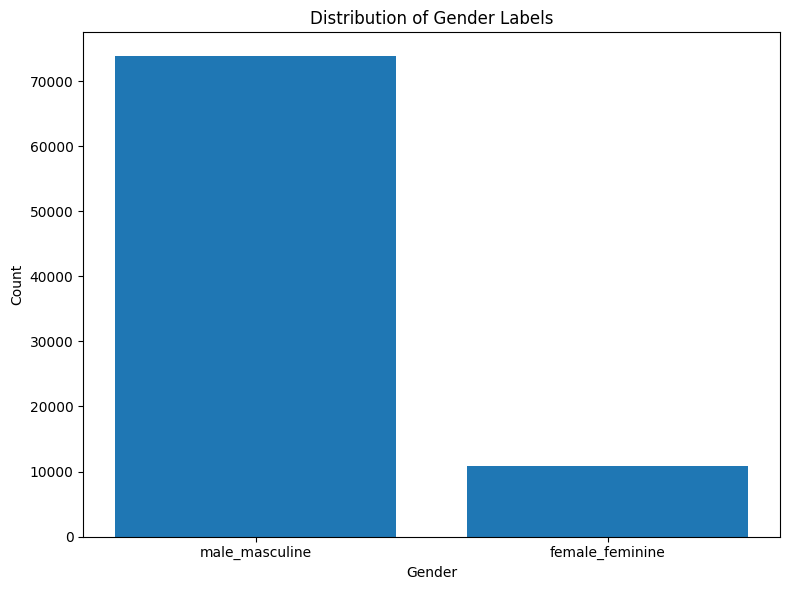

In [16]:
import matplotlib.pyplot as plt

# AGE DISTRIBUTION PLOT
age_counts = df['age'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.bar(age_counts.index.astype(str), age_counts.values)
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Distribution of Age Labels")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# GENDER DISTRIBUTION PLOT
gender_counts = df['gender'].value_counts()

plt.figure(figsize=(8, 6))
plt.bar(gender_counts.index.astype(str), gender_counts.values)
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Distribution of Gender Labels")
plt.tight_layout()
plt.show()


In [17]:
# Removing 90's from the dataset because we have only 3 of them which not useful
df = df[df['age'] != 'nineties'].copy()

In [18]:
df['gender'].unique()

array(['male_masculine', 'female_feminine'], dtype=object)

In [19]:
# mapping male_masculin to male and female_feminine to female
df['gender'] = df['gender'].map({
    'male_masculine': 'male',
    'female_feminine': 'female'
})

In [20]:
#sixties and seventies are very few in samples so merging both of them
age_map = {
    'teens': 'teens',
    'twenties': 'twenties',
    'thirties': 'thirties',
    'fourties': 'fourties',
    'fifties': 'fifties',
    'sixties': '60plus',
    'seventies': '60plus'
}

df['age'] = df['age'].map(age_map)

In [21]:
group_counts = df.groupby(['age', 'gender']).size()
N = group_counts.min()

print("\n--- Group Counts (Age x Gender) ---")
print(group_counts)
print(f"\nSmallest group (N) has: {N} samples")


--- Group Counts (Age x Gender) ---
age       gender
60plus    female      996
          male       3996
fifties   female     3103
          male       6119
fourties  female     1218
          male      11197
teens     female      853
          male       6198
thirties  female     2069
          male      16981
twenties  female     2634
          male      29327
dtype: int64

Smallest group (N) has: 853 samples


In [24]:
balanced_df_list = []
for (age, gender), group in df.groupby(['age', 'gender']):
    # Randomly sample N clips from this group
    balanced_df_list.append(group.sample(N, random_state=42))

# Combine all the balanced samples into one final dataframe
final_balanced_df = pd.concat(balanced_df_list)

# Shuffle the dataframe just to be safe
final_balanced_df = final_balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

print(f"\n--- New Balanced Dataset ---")

print("\nNew Age Distribution:")
print(final_balanced_df['age'].value_counts())

print("\nNew Gender Distribution:")
print(final_balanced_df['gender'].value_counts())

# Save the new balanced list
balanced_list_path = "/content/drive/MyDrive/voice_project/final_balanced_list.csv"
final_balanced_df.to_csv(balanced_list_path, index=False)

print(f"\nSuccessfully saved balanced dataset to: {balanced_list_path}")


--- New Balanced Dataset ---

New Age Distribution:
age
fourties    1706
60plus      1706
fifties     1706
teens       1706
twenties    1706
thirties    1706
Name: count, dtype: int64

New Gender Distribution:
gender
female    5118
male      5118
Name: count, dtype: int64

Successfully saved balanced dataset to: /content/drive/MyDrive/voice_project/final_balanced_list.csv


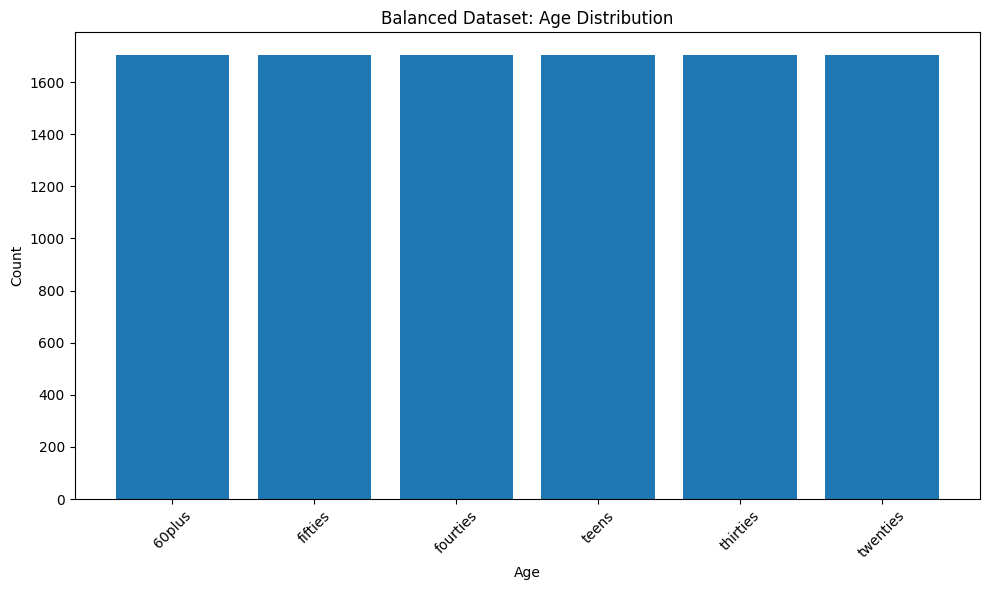

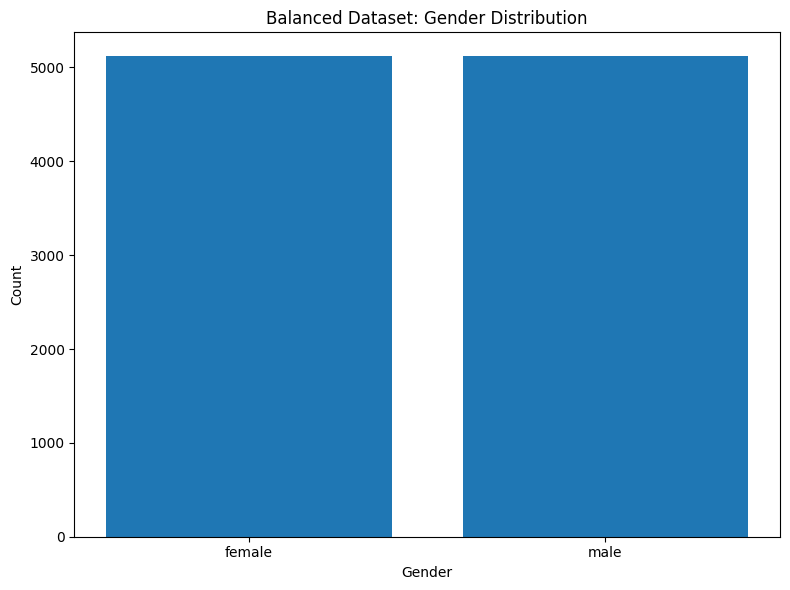

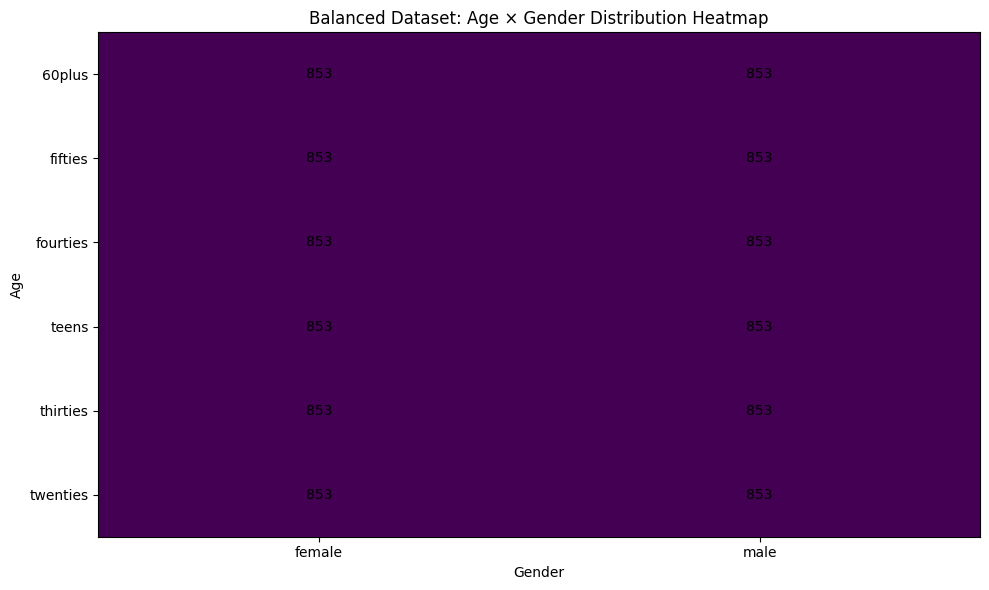

In [23]:
import matplotlib.pyplot as plt
import pandas as pd


# AGE DISTRIBUTION (BALANCED DATASET)

age_counts_bal = final_balanced_df['age'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.bar(age_counts_bal.index.astype(str), age_counts_bal.values)
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Balanced Dataset: Age Distribution")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# GENDER DISTRIBUTION (BALANCED DATASET)

gender_counts_bal = final_balanced_df['gender'].value_counts()

plt.figure(figsize=(8, 6))
plt.bar(gender_counts_bal.index.astype(str), gender_counts_bal.values)
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Balanced Dataset: Gender Distribution")
plt.tight_layout()
plt.show()



# AGE × GENDER HEATMAP (SUPER USEFUL)

cross_tab = pd.crosstab(final_balanced_df['age'], final_balanced_df['gender'])

plt.figure(figsize=(10, 6))
plt.imshow(cross_tab, aspect='auto')

plt.xticks(range(len(cross_tab.columns)), cross_tab.columns)
plt.yticks(range(len(cross_tab.index)), cross_tab.index)

plt.xlabel("Gender")
plt.ylabel("Age")
plt.title("Balanced Dataset: Age × Gender Distribution Heatmap")

# Add values on the heatmap
for i in range(len(cross_tab.index)):
    for j in range(len(cross_tab.columns)):
        plt.text(j, i, cross_tab.iloc[i, j], ha='center', va='center')

plt.tight_layout()
plt.show()
